In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [8]:
start = time.time()
diabets = pd.read_csv('datasets/pima-indians-diabetes.csv' ).dropna(how = 'all')
print(time.time() - start)
diabets.dtypes

0.00539398193359


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
diabets.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
diabets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


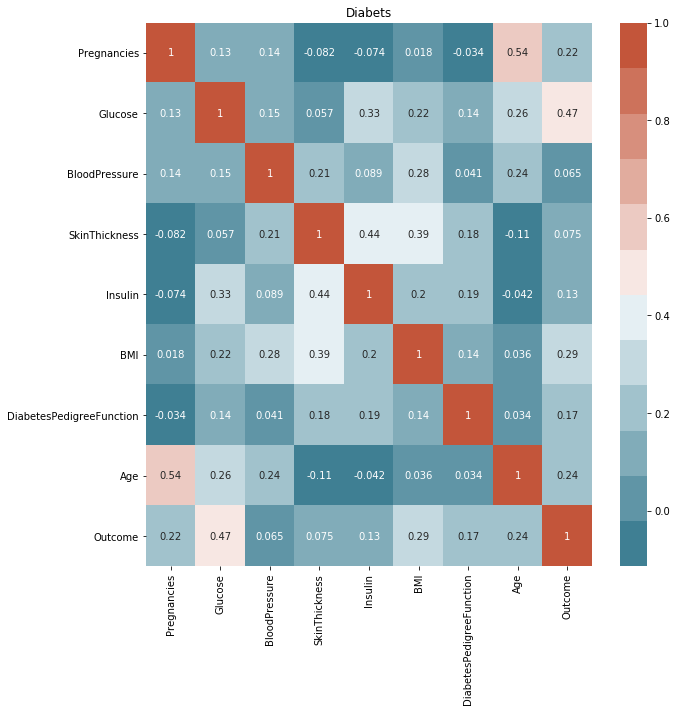

In [14]:
plt.figure(figsize=(10, 10))
df_corr = diabets.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Diabets")
plt.show()

In [15]:
diabets['Pregnancies'] = diabets['Pregnancies'].apply(lambda x: 0 if x == 1 else 1)

In [16]:
diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,148,72,35,0,33.6,0.627,50,1
1,0,85,66,29,0,26.6,0.351,31,0
2,1,183,64,0,0,23.3,0.672,32,1
3,0,89,66,23,94,28.1,0.167,21,0
4,1,137,40,35,168,43.1,2.288,33,1
5,1,116,74,0,0,25.6,0.201,30,0
6,1,78,50,32,88,31.0,0.248,26,1
7,1,115,0,0,0,35.3,0.134,29,0
8,1,197,70,45,543,30.5,0.158,53,1
9,1,125,96,0,0,0.0,0.232,54,1


In [599]:
diabets['BloodPressure'] = diabets['BloodPressure'].replace(0, 69)

In [600]:
diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,148,72,35,0,33.6,0.627,50,1
1,0,85,66,29,0,26.6,0.351,31,0
2,1,183,64,0,0,23.3,0.672,32,1
3,0,89,66,23,94,28.1,0.167,21,0
4,1,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,1,101,76,48,180,32.9,0.171,63,0
764,1,122,70,27,0,36.8,0.340,27,0
765,1,121,72,23,112,26.2,0.245,30,0
766,0,126,60,0,0,30.1,0.349,47,1


In [601]:
diabets['BMI'].mean()

31.992578124999998

In [602]:
diabets['BMI'] = diabets['BMI'].replace(0, 31.99)

In [603]:
diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,148,72,35,0,33.6,0.627,50,1
1,0,85,66,29,0,26.6,0.351,31,0
2,1,183,64,0,0,23.3,0.672,32,1
3,0,89,66,23,94,28.1,0.167,21,0
4,1,137,40,35,168,43.1,2.288,33,1


In [604]:
diabets['Glucose'].mean()

120.89453125

In [605]:
diabets['Glucose'] = diabets['Glucose'].replace(0, 120)

In [606]:
diabets['SkinThickness'].mean()

20.536458333333332

In [607]:
diabets['SkinThickness'] = diabets['SkinThickness'].replace(0, 20)

In [608]:
diabets['Insulin'].mean()

79.79947916666667

In [609]:
diabets['Insulin'] = diabets['Insulin'].replace(0 , 79)

In [610]:
pregnent_series = diabets['Pregnancies']

In [611]:
klass_series = diabets['Outcome']

In [612]:
diabets = diabets.drop(columns=['Pregnancies', 'Outcome'])

In [613]:
# Get column names first
cols = diabets.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_diabets = scaler.fit_transform(diabets)
scaled_STD_diabets = pd.DataFrame(scaled_diabets, columns=cols)

In [614]:
scaled_STD_diabets.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.865461,-0.020645,0.879163,-0.421437,0.167261,0.468492,1.425995
1,-1.205788,-0.516132,0.262357,-0.421437,-0.851529,-0.365061,-0.190672
2,2.016154,-0.681294,-0.662852,-0.421437,-1.331815,0.604397,-0.105584
3,-1.074281,-0.516132,-0.354449,-0.260464,-0.633217,-0.920763,-1.041549
4,0.503814,-2.663240,0.879163,0.533672,1.549904,5.484909,-0.020496


In [615]:
scaled_STD_diabets['Pregnancies'] = pregnent_series

In [616]:
scaled_STD_diabets['Outcome'] = klass_series

In [617]:
scaled_STD_diabets.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.865461,-0.020645,0.879163,-0.421437,0.167261,0.468492,1.425995,1,1
1,-1.205788,-0.516132,0.262357,-0.421437,-0.851529,-0.365061,-0.190672,0,0
2,2.016154,-0.681294,-0.662852,-0.421437,-1.331815,0.604397,-0.105584,1,1
3,-1.074281,-0.516132,-0.354449,-0.260464,-0.633217,-0.920763,-1.041549,0,0
4,0.503814,-2.663240,0.879163,0.533672,1.549904,5.484909,-0.020496,1,1


In [618]:
scaled_STD_diabets.to_csv('datasets/scaled_STD_diabets.csv', index=False)

In [619]:
cols = diabets.columns
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
sclaed_MINMAX_diabets = min_max_scaler.fit_transform(diabets)

# Run the normalizer on the dataframe
sclaed_MINMAX_diabets = pd.DataFrame(sclaed_MINMAX_diabets , columns=cols)

In [620]:
sclaed_MINMAX_diabets['Pregnancies'] = pregnent_series

In [621]:
sclaed_MINMAX_diabets['Outcome'] = klass_series

In [622]:
sclaed_MINMAX_diabets.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.078125,0.314928,0.234415,0.483333,1,1
1,0.264516,0.428571,0.239130,0.078125,0.171779,0.116567,0.166667,0,0
2,0.896774,0.408163,0.141304,0.078125,0.104294,0.253629,0.183333,1,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1,1


In [623]:
sclaed_MINMAX_diabets.to_csv('datasets/scaled_MINMAX_diabets.csv', index=False)

In [624]:
MINMAX_data_frame = pd.read_csv('datasets/scaled_MINMAX_diabets.csv')

In [625]:
cols = list(MINMAX_data_frame.columns)
cols.remove('Outcome')
columns = cols
MINMAX_data_frame = MINMAX_data_frame.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=columns)

In [626]:
MINMAX_data_frame['Outcome'] = MINMAX_data_frame['Outcome'].replace(pd.np.nan, 0)

In [627]:
MINMAX_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 765
Data columns (total 9 columns):
Glucose                     589 non-null float64
BloodPressure               589 non-null float64
SkinThickness               589 non-null float64
Insulin                     589 non-null float64
BMI                         589 non-null float64
DiabetesPedigreeFunction    589 non-null float64
Age                         589 non-null float64
Pregnancies                 589 non-null float64
Outcome                     589 non-null float64
dtypes: float64(9)
memory usage: 46.0 KB


In [628]:
import seaborn as sns
import matplotlib.pyplot as plt

In [629]:
Outcome_save = MINMAX_data_frame['Outcome']
Pregnecies_save = MINMAX_data_frame['Pregnancies']
del MINMAX_data_frame['Outcome']
del MINMAX_data_frame['Pregnancies']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


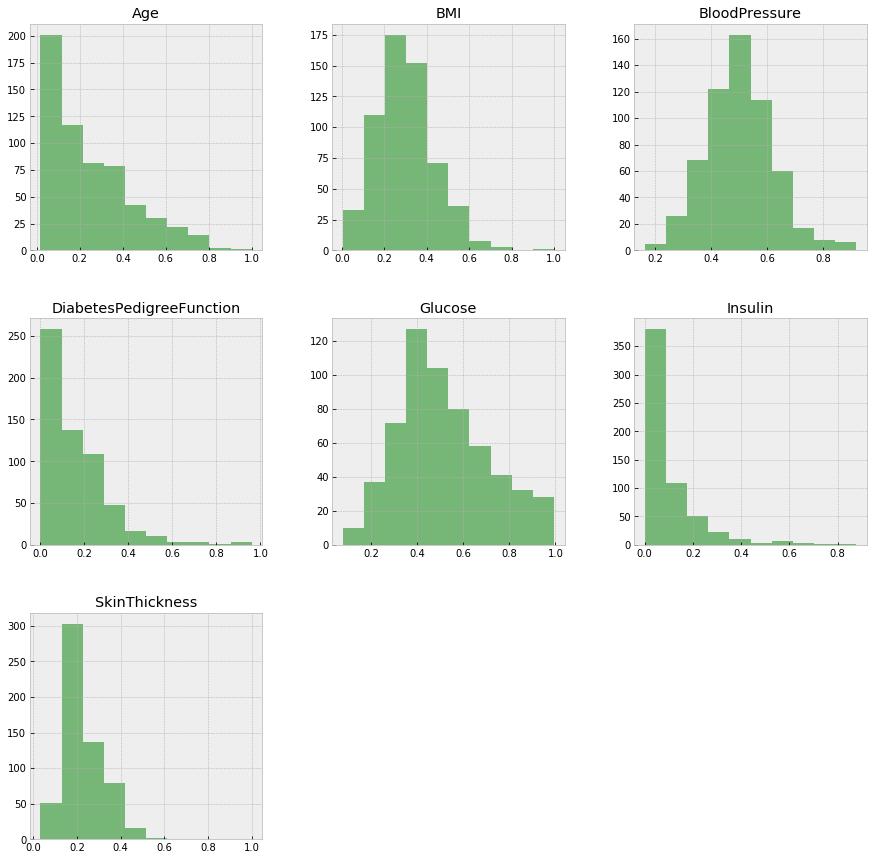

In [630]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
MINMAX_data_frame.hist(ax=ax , color = 'g' , alpha = 0.5)
plt.style.use('bmh')
plt.show()

In [631]:
MINMAX_data_frame['Pregnancies'] = Pregnecies_save 
MINMAX_data_frame['Outcome'] = Outcome_save 


In [632]:
MINMAX_data_frame

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.078125,0.314928,0.234415,0.483333,1.0,1.0
2,0.896774,0.408163,0.141304,0.078125,0.104294,0.253629,0.183333,1.0,1.0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0,1.0
5,0.464516,0.510204,0.141304,0.078125,0.151329,0.052519,0.150000,1.0,0.0
6,0.219355,0.265306,0.271739,0.088942,0.261759,0.072588,0.083333,1.0,1.0
...,...,...,...,...,...,...,...,...,...
761,0.812903,0.510204,0.260870,0.078125,0.527607,0.138770,0.366667,1.0,1.0
762,0.290323,0.387755,0.141304,0.078125,0.087935,0.027327,0.200000,1.0,0.0
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,1.0,0.0
764,0.503226,0.469388,0.217391,0.078125,0.380368,0.111870,0.100000,1.0,0.0


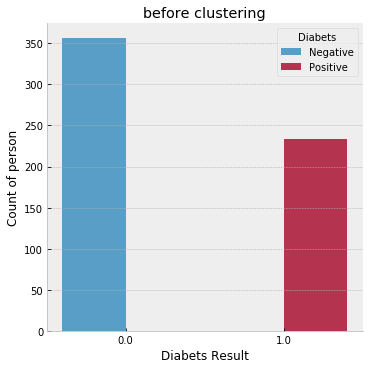

In [633]:
snsplot = sns.catplot( x ='Outcome' , data = MINMAX_data_frame , kind ='count' , saturation = 1 , hue = 'Outcome'  , alpha = 0.8 )
plt.legend(title='Diabets', loc='upper right', labels=['Negative', 'Positive'])
plt.xlabel('Diabets Result')
plt.ylabel('Count of person')
plt.title('before clustering')
plt.show()
snsplot.savefig('image/count_of_diabetics_beforeClustering.jpeg')

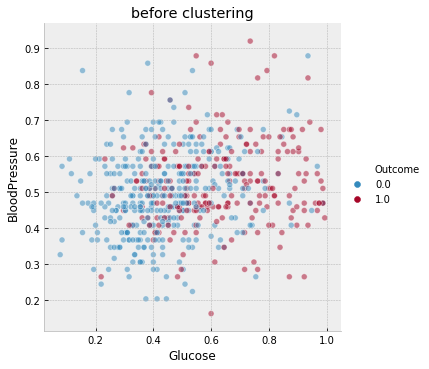

In [635]:
snsplot = sns.relplot(x ='Glucose', y ='BloodPressure', data = MINMAX_data_frame ,  kind ='scatter' , hue = 'Outcome' , alpha = 0.5 )
plt.title('before clustering')
plt.show()
snsplot.savefig('image/Blood_Pressure_beforeClustering.jpeg')

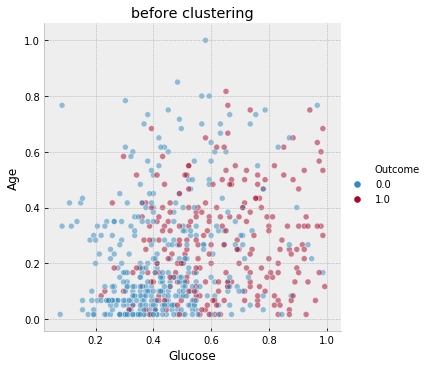

In [636]:
snsplot = sns.relplot(x ='Glucose', y ='Age', data = MINMAX_data_frame ,  kind ='scatter' , hue = 'Outcome' , alpha = 0.5 )
plt.title('before clustering')
plt.show()
snsplot.savefig('image/Age_beforeClustering.jpeg')

In [637]:
del MINMAX_data_frame['Outcome']
del MINMAX_data_frame['Pregnancies']

In [638]:
km = KMeans(n_clusters=2 ,max_iter=100)
predict = km.fit_predict(MINMAX_data_frame)

In [639]:
MINMAX_data_frame['Cluster'] = predict

In [640]:
MINMAX_data_frame['Cluster'] = MINMAX_data_frame['Cluster'].apply(lambda x: 1 if x == 0 else 0)

In [641]:
cols = list(MINMAX_data_frame.columns)
cols.remove('Cluster')
columns = cols
MINMAX_data_frame = MINMAX_data_frame.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=columns)

In [642]:
MINMAX_data_frame['Cluster'] = MINMAX_data_frame['Cluster'].replace(pd.np.nan, 0)

In [643]:
MINMAX_data_frame

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,0.670968,0.489796,0.304348,0.078125,0.314928,0.234415,0.483333,1.0
2,0.896774,0.408163,0.141304,0.078125,0.104294,0.253629,0.183333,1.0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
5,0.464516,0.510204,0.141304,0.078125,0.151329,0.052519,0.150000,0.0
6,0.219355,0.265306,0.271739,0.088942,0.261759,0.072588,0.083333,0.0
...,...,...,...,...,...,...,...,...
761,0.812903,0.510204,0.260870,0.078125,0.527607,0.138770,0.366667,1.0
762,0.290323,0.387755,0.141304,0.078125,0.087935,0.027327,0.200000,0.0
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,1.0
764,0.503226,0.469388,0.217391,0.078125,0.380368,0.111870,0.100000,0.0


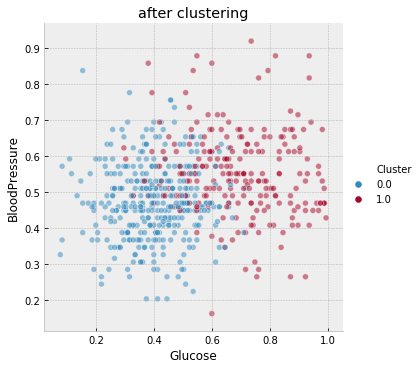

In [644]:
snsplot = sns.relplot(x ='Glucose', y ='BloodPressure', data = MINMAX_data_frame ,  kind ='scatter' , hue = 'Cluster' , alpha = 0.5 )
plt.title('after clustering')
plt.show()
snsplot.savefig('image/afterClustering.jpeg')

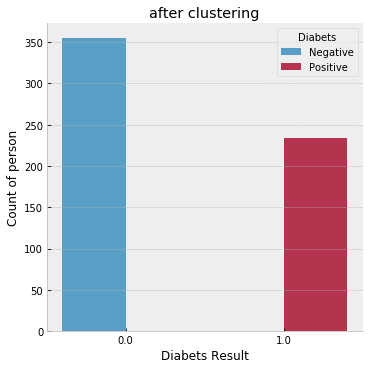

In [645]:
snsplot = sns.catplot( x ='Cluster' , data = MINMAX_data_frame , kind ='count' , saturation = 1 , hue = 'Cluster'  , alpha = 0.8 )
plt.legend(title='Diabets', loc='upper right', labels=['Negative', 'Positive'])
plt.xlabel('Diabets Result')
plt.ylabel('Count of person')
plt.title('after clustering')
plt.show()
snsplot.savefig('image/count_of_diabetics_afterClustering.jpeg')

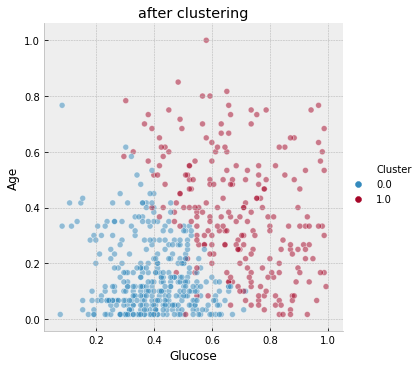

In [646]:
snsplot = sns.relplot(x ='Glucose', y ='Age', data = MINMAX_data_frame ,  kind ='scatter' , hue = 'Cluster' , alpha = 0.5 )
plt.title('after clustering')
plt.show()
snsplot.savefig('image/Age_afterClustering.jpeg')